In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = {
    'Idade (anos)': [2, 6, 1, 4, 3, 5],
    'Horas Desde a Última Manutenção': [50, 200, 20, 150, 100, 180],
    'Histórico de Falhas': ['Nenhuma', '2', 'Nenhuma', '1', '3', '2'],
    'Classificação': ['Necessita', 'Necessita', 'Necessita', 'Não Necessita', 'Necessita', 'Não Necessita']
}

df = pd.DataFrame(dados)
print("Dataset:")
print(df)
print()

Dataset:
   Idade (anos)  Horas Desde a Última Manutenção Histórico de Falhas  \
0             2                               50             Nenhuma   
1             6                              200                   2   
2             1                               20             Nenhuma   
3             4                              150                   1   
4             3                              100                   3   
5             5                              180                   2   

   Classificação  
0      Necessita  
1      Necessita  
2      Necessita  
3  Não Necessita  
4      Necessita  
5  Não Necessita  



In [3]:
le_historico = LabelEncoder()
le_classificacao = LabelEncoder()

X = df.copy()
X['Histórico de Falhas'] = le_historico.fit_transform(df['Histórico de Falhas'])
X = X[['Idade (anos)', 'Horas Desde a Última Manutenção', 'Histórico de Falhas']]

y = le_classificacao.fit_transform(df['Classificação'])

In [4]:
arvore = DecisionTreeClassifier(random_state=42, max_depth=3)
arvore.fit(X, y)

print(f"Acurácia: {arvore.score(X, y):.2%}\n")

Acurácia: 100.00%



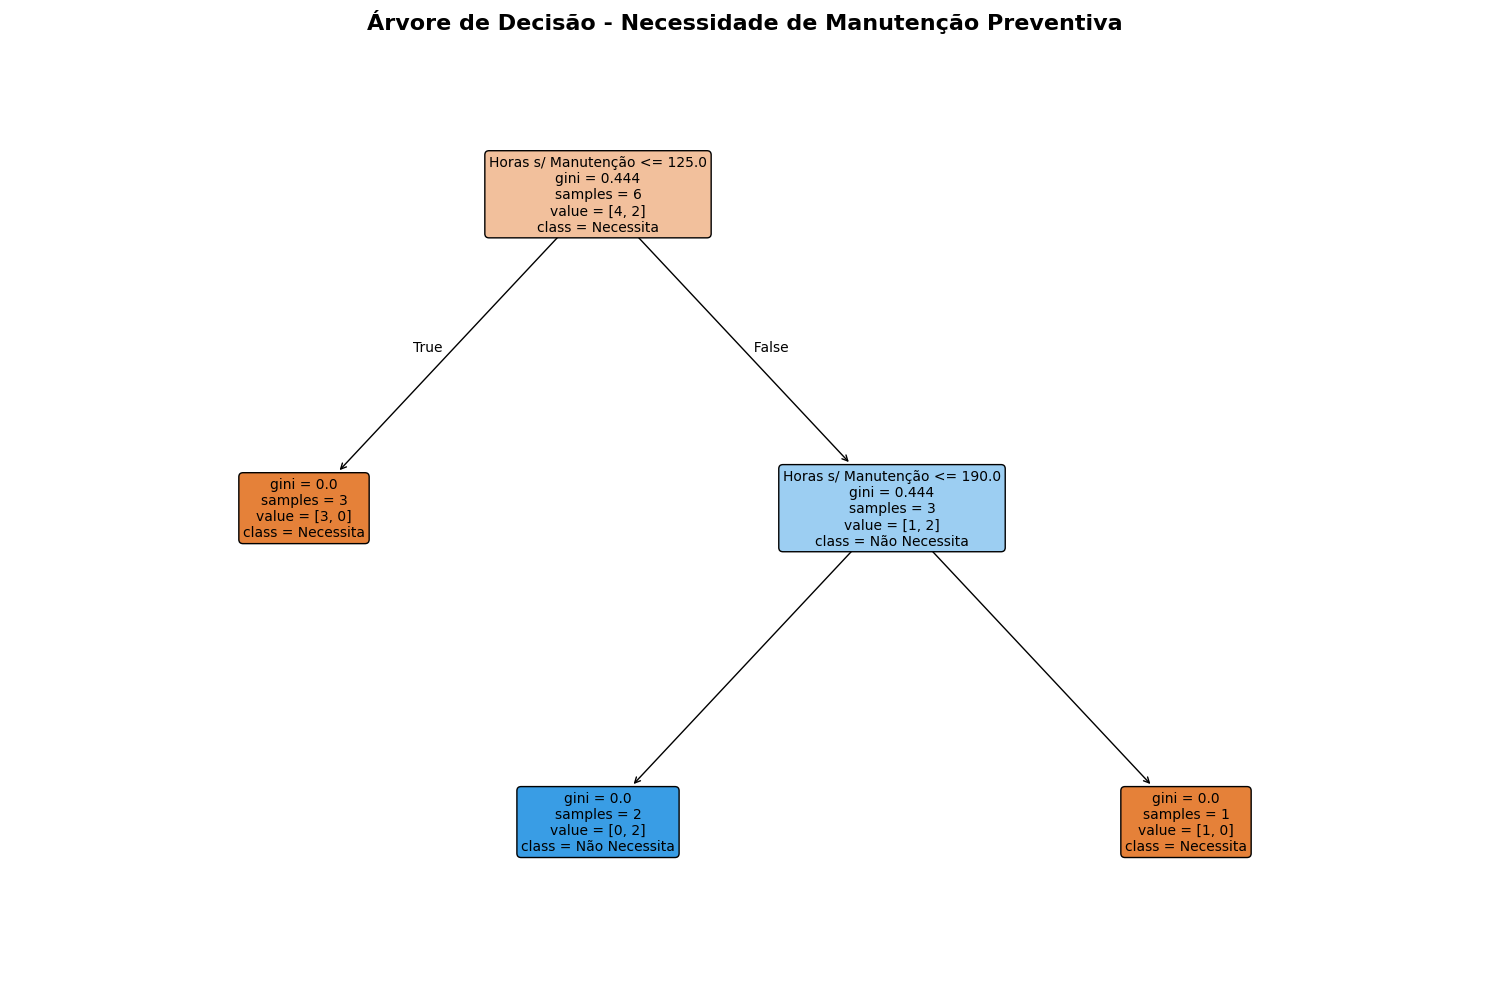

In [5]:
plt.figure(figsize=(15, 10))
tree.plot_tree(arvore, 
               feature_names=['Idade', 'Horas s/ Manutenção', 'Histórico Falhas'],
               class_names=['Necessita', 'Não Necessita'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Árvore de Decisão - Necessidade de Manutenção Preventiva', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()